In [1]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/hindi_data.csv')
print(df.head())

  Sentence  Score
0       ही     -1
1  प्राचीन     -1
2   प्रकार     -1
3     जाती     -1
4       शक     -1


In [4]:
print(df.head())

  Sentence  Score
0       ही     -1
1  प्राचीन     -1
2   प्रकार     -1
3     जाती     -1
4       शक     -1


In [5]:
main_data = df["Sentence"].tolist()

<AxesSubplot: xlabel='Score', ylabel='count'>

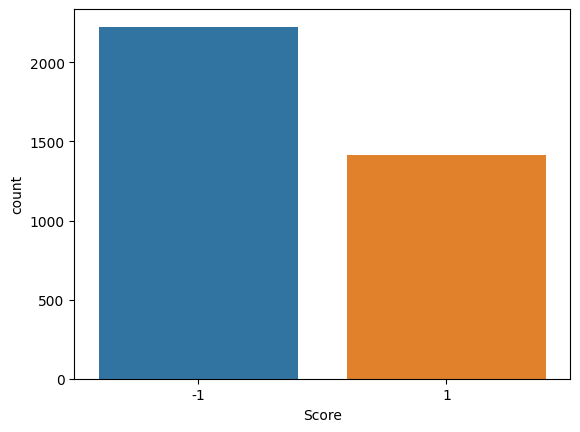

In [6]:
import seaborn as sns
sns.countplot(x='Score', data=df)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(main_data)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df['Score'], test_size=0.4, random_state=4)

In [10]:
LogReg = LogisticRegression().fit(X_train, y_train)
accuracy1 = LogReg.score(X_test, y_test)

In [11]:
RandForest = RandomForestClassifier().fit(X_train, y_train)
accuracy2 = RandForest.score(X_test, y_test)

In [12]:
KNeighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
accuracy3 = KNeighbors.score(X_test, y_test)

In [13]:
SupportVec = SVC().fit(X_train, y_train)
accuracy4 = SupportVec.score(X_test, y_test)

In [14]:
for i in range(1, 5):
    print("Accuracy {}: {}".format(i, eval("accuracy" + str(i))*100))

Accuracy 1: 62.52573781743308
Accuracy 2: 63.761153054221
Accuracy 3: 63.2120796156486
Accuracy 4: 63.486616334934794


In [15]:
import re
import string

def clear_text(text):
    # List of all English characters and numbers
    eng_chars = string.ascii_letters + string.digits

    # List of all punctuation characters
    punc_chars = string.punctuation

    # Combine the two lists
    remove_chars = eng_chars + punc_chars

    # Remove all characters in the remove_chars list from the text
    text = ''.join(c for c in text if c not in remove_chars)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [16]:
def sentiPrediction(input_data):
    input_data = clear_text(input_data)
    new_statement = vectorizer.transform([input_data])
    prediction = GBC.predict(new_statement)
    print("The final prediction for the new statement is:", prediction)


In [17]:
#sentiPrediction(input())

In [18]:
import pickle

In [19]:
# Saving the Logistic Regression model
with open('LogReg_hindi.pickle', 'wb') as handle:
    pickle.dump(LogReg, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the Random Forest model
with open('RandForest_hindi.pickle', 'wb') as handle:
    pickle.dump(RandForest, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the KNeighbors model
with open('KNeighbors_hindi.pickle', 'wb') as handle:
    pickle.dump(KNeighbors, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [20]:
# Saving the Support Vector Machine model
with open('SupportVec_hindi.pickle', 'wb') as handle:
    pickle.dump(SupportVec, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [21]:
with open("vectorizer_hindi.pickle", "wb") as f:
    pickle.dump(vectorizer, f)